In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import glob



Text(0, 0.5, 'Force (kN)')

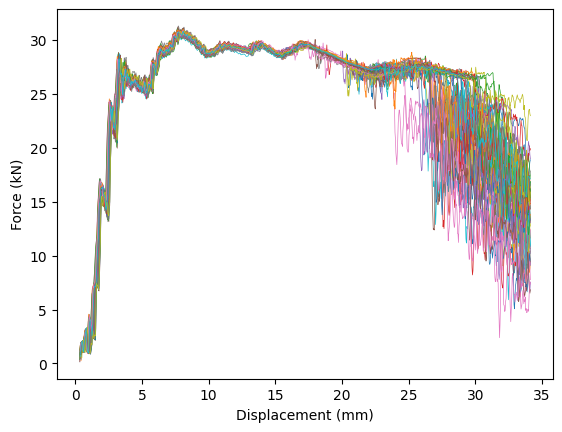

In [5]:
for i in range(1, 51):
    df = pd.read_csv('Simulation_BENDING/Locked_bending_thickness/BENDING_X_data.csv/BENDING_'+ str(i) +'_data.csv')
    plt.plot(df['DMM'], df['FKN'], linewidth=0.5)
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')

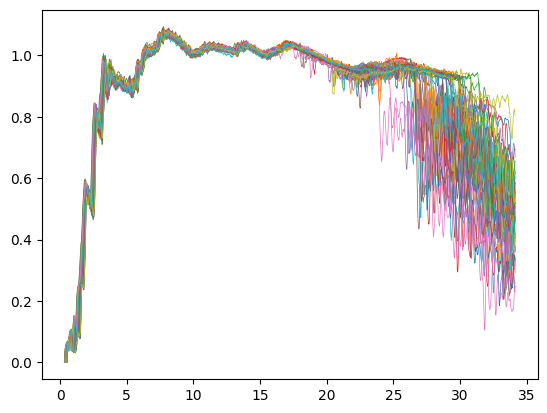

In [7]:
# Calculate energy
energy_df = pd.DataFrame()

for test_number in range(1, 51):
    df = pd.read_csv('Simulation_BENDING/Locked_bending_thickness/BENDING_X_data.csv/BENDING_'+str(test_number)+'_data.csv')
    energy_array = [0]
    for i in range (1, len(df)):
        delta_displacement = (df['DMM'].iloc[i] - df['DMM'].iloc[i-1])
        mean_force = (df['FKN'].iloc[i-1] + df['FKN'].iloc[i])/2
        energy_array.append(mean_force * delta_displacement)
    energy_sum_df = pd.DataFrame({'Energy': [sum(energy_array)]})
    energy_df = pd.concat([energy_df, energy_sum_df], ignore_index=True)
    plt.plot(df['DMM'], energy_array, linewidth=0.5)

    

In [8]:
print(energy_df)

        Energy
0   843.874761
1   847.626196
2   872.993077
3   864.281279
4   860.347260
5   834.092614
6   834.885124
7   850.887364
8   812.096299
9   793.371520
10  873.527562
11  839.288095
12  859.348752
13  803.521221
14  821.099668
15  849.814346
16  820.859290
17  842.642953
18  888.378078
19  848.828633
20  864.239028
21  830.967010
22  880.028444
23  887.000809
24  873.454881
25  843.912892
26  849.231753
27  858.974787
28  862.391429
29  854.456260
30  792.852440
31  876.913904
32  877.661950
33  845.998631
34  816.116951
35  854.602418
36  788.246631
37  850.928935
38  842.111168
39  850.214448
40  843.373599
41  858.340689
42  850.889495
43  851.404625
44  845.536484
45  805.375112
46  778.275787
47  859.194035
48  868.565220
49  861.233806


ValueError: x and y must have same first dimension, but have shapes (965,) and (968,)

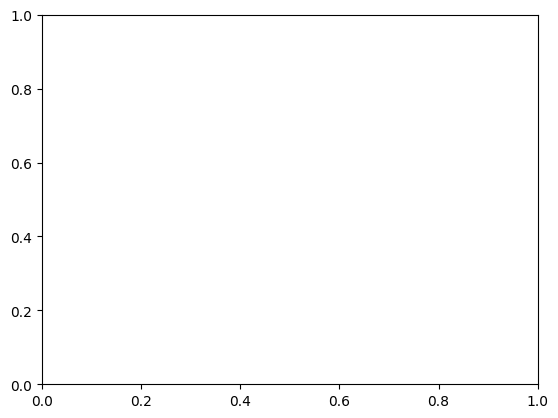

In [9]:
# Assuming the files are in a folder called 'Simulation_BENDING/Results'
folder_path = 'Simulation_BENDING/Locked_bending_thickness/BENDING_X_data.csv'
file_pattern = os.path.join(folder_path, 'BENDING_*_data.csv')
file_list = glob.glob(file_pattern)

# Initialize lists to hold all the data
all_force_data = []

# Read each file and append the force data to the list
for file in file_list:
    df = pd.read_csv(file)
    displacement = df['DMM']  # Assuming 'DMM' is the displacement column
    force = df['FKN']         # Assuming 'FKN' is the force column
    all_force_data.append(force)

# Convert the list of series into a DataFrame
force_data_df = pd.concat(all_force_data, axis=1)

# Calculate max, min, and mean values across columns for each displacement
max_force = force_data_df.max(axis=1)
min_force = force_data_df.min(axis=1)
mean_force = force_data_df.mean(axis=1)
median_force = force_data_df.median(axis=1)


# Now plot these as functions of displacement
plt.plot(displacement, max_force, label='Max Force', linewidth=0.5, color='blue')
plt.plot(displacement, min_force, label='Min Force', linewidth=0.5, color='blue')
plt.plot(displacement, mean_force, label='Mean Force', linewidth=2, color='red')
plt.plot(displacement, median_force, label='Median Force', linewidth=2, color='green')
plt.fill_between(displacement, min_force, max_force, color='blue', alpha=0.2)

# Add labels and legend
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')
plt.title('Force-Displacement')
plt.legend()

plt.show()


In [13]:
max_force_df = pd.DataFrame()
parameters = pd.read_csv('Simulation_BENDING/parameters_v3.csv')
for i in range(50):
    new_data = pd.read_csv('Simulation_BENDING/Locked_bending_thickness/BENDING_X_data.csv/BENDING_'+ str(i+1) +'_data.csv')
    max_force = new_data['FKN'].max()
    new_data_df = pd.DataFrame()
    new_data_df['max_force'] = [max_force]
    for parameter in parameters.columns:
        new_data_df[parameter] = parameters[parameter][i]
    max_force_df = pd.concat([max_force_df, new_data_df])

max_force_df.reset_index(drop=True, inplace=True)
max_force_df = max_force_df.drop(columns=['sample'])

max_force_df.head()

,max_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,30.619020,2.67,2.05,1.23,76.35,127.83,284.50,66823.0
1,30.649348,2.77,2.04,1.55,76.36,128.46,264.61,66069.3
2,30.730293,2.65,1.93,1.27,76.50,127.81,273.76,66742.0
3,30.811150,2.66,1.82,1.51,75.23,128.19,257.80,71321.8
4,30.568070,2.71,1.82,1.29,75.80,128.07,278.94,71487.6


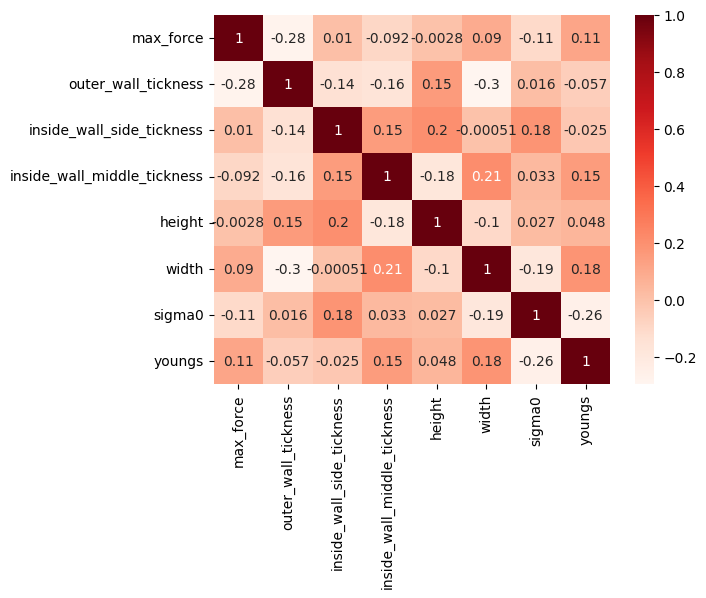

In [14]:
dataplot = sb.heatmap(max_force_df.corr(), cmap="Reds", annot=True)  
plt.show()

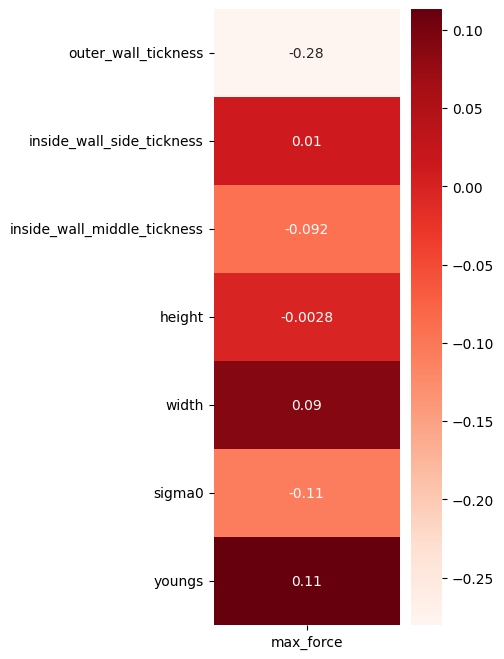

In [15]:
correlation_matrix = max_force_df.corr()
fkn_correlation = correlation_matrix[['max_force']].drop('max_force')

plt.figure(figsize=(3, 8))  # Adjust the size to fit your particular needs
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

In [17]:
mean_force_df = pd.DataFrame()

for i in range(50):
    new_data = pd.read_csv('Simulation_BENDING/Locked_bending_thickness/BENDING_X_data.csv/BENDING_'+str(i+1)+'_data.csv')
    mean_force = new_data['FKN'].mean()
    new_data_df = pd.DataFrame()
    new_data_df['mean_force'] = [mean_force]
    for parameter in parameters.columns:
        new_data_df[parameter] = parameters[parameter][i]
    mean_force_df = pd.concat([mean_force_df, new_data_df])

mean_force_df.reset_index(drop=True, inplace=True)
mean_force_df = mean_force_df.drop(columns=['sample'])

mean_force_df.head()

,mean_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,24.993380,2.67,2.05,1.23,76.35,127.83,284.50,66823.0
1,25.157741,2.77,2.04,1.55,76.36,128.46,264.61,66069.3
2,25.857647,2.65,1.93,1.27,76.50,127.81,273.76,66742.0
3,25.598594,2.66,1.82,1.51,75.23,128.19,257.80,71321.8
4,25.509120,2.71,1.82,1.29,75.80,128.07,278.94,71487.6


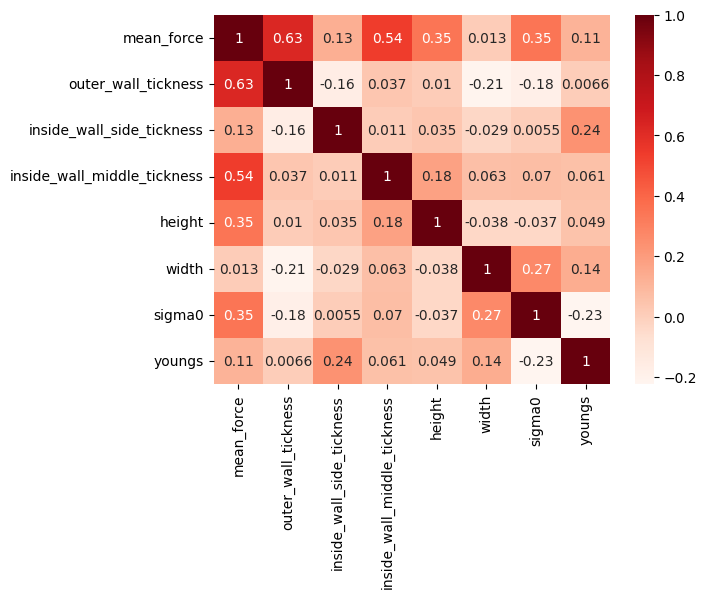

In [86]:
dataplot = sb.heatmap(mean_force_df.corr(), cmap="Reds", annot=True)  
plt.show()

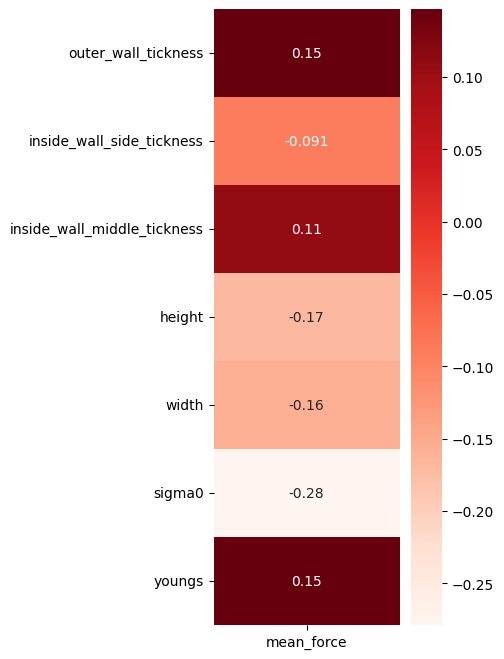

In [18]:
correlation_matrix = mean_force_df.corr()
fkn_correlation = correlation_matrix[['mean_force']].drop('mean_force')

plt.figure(figsize=(3, 8))
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

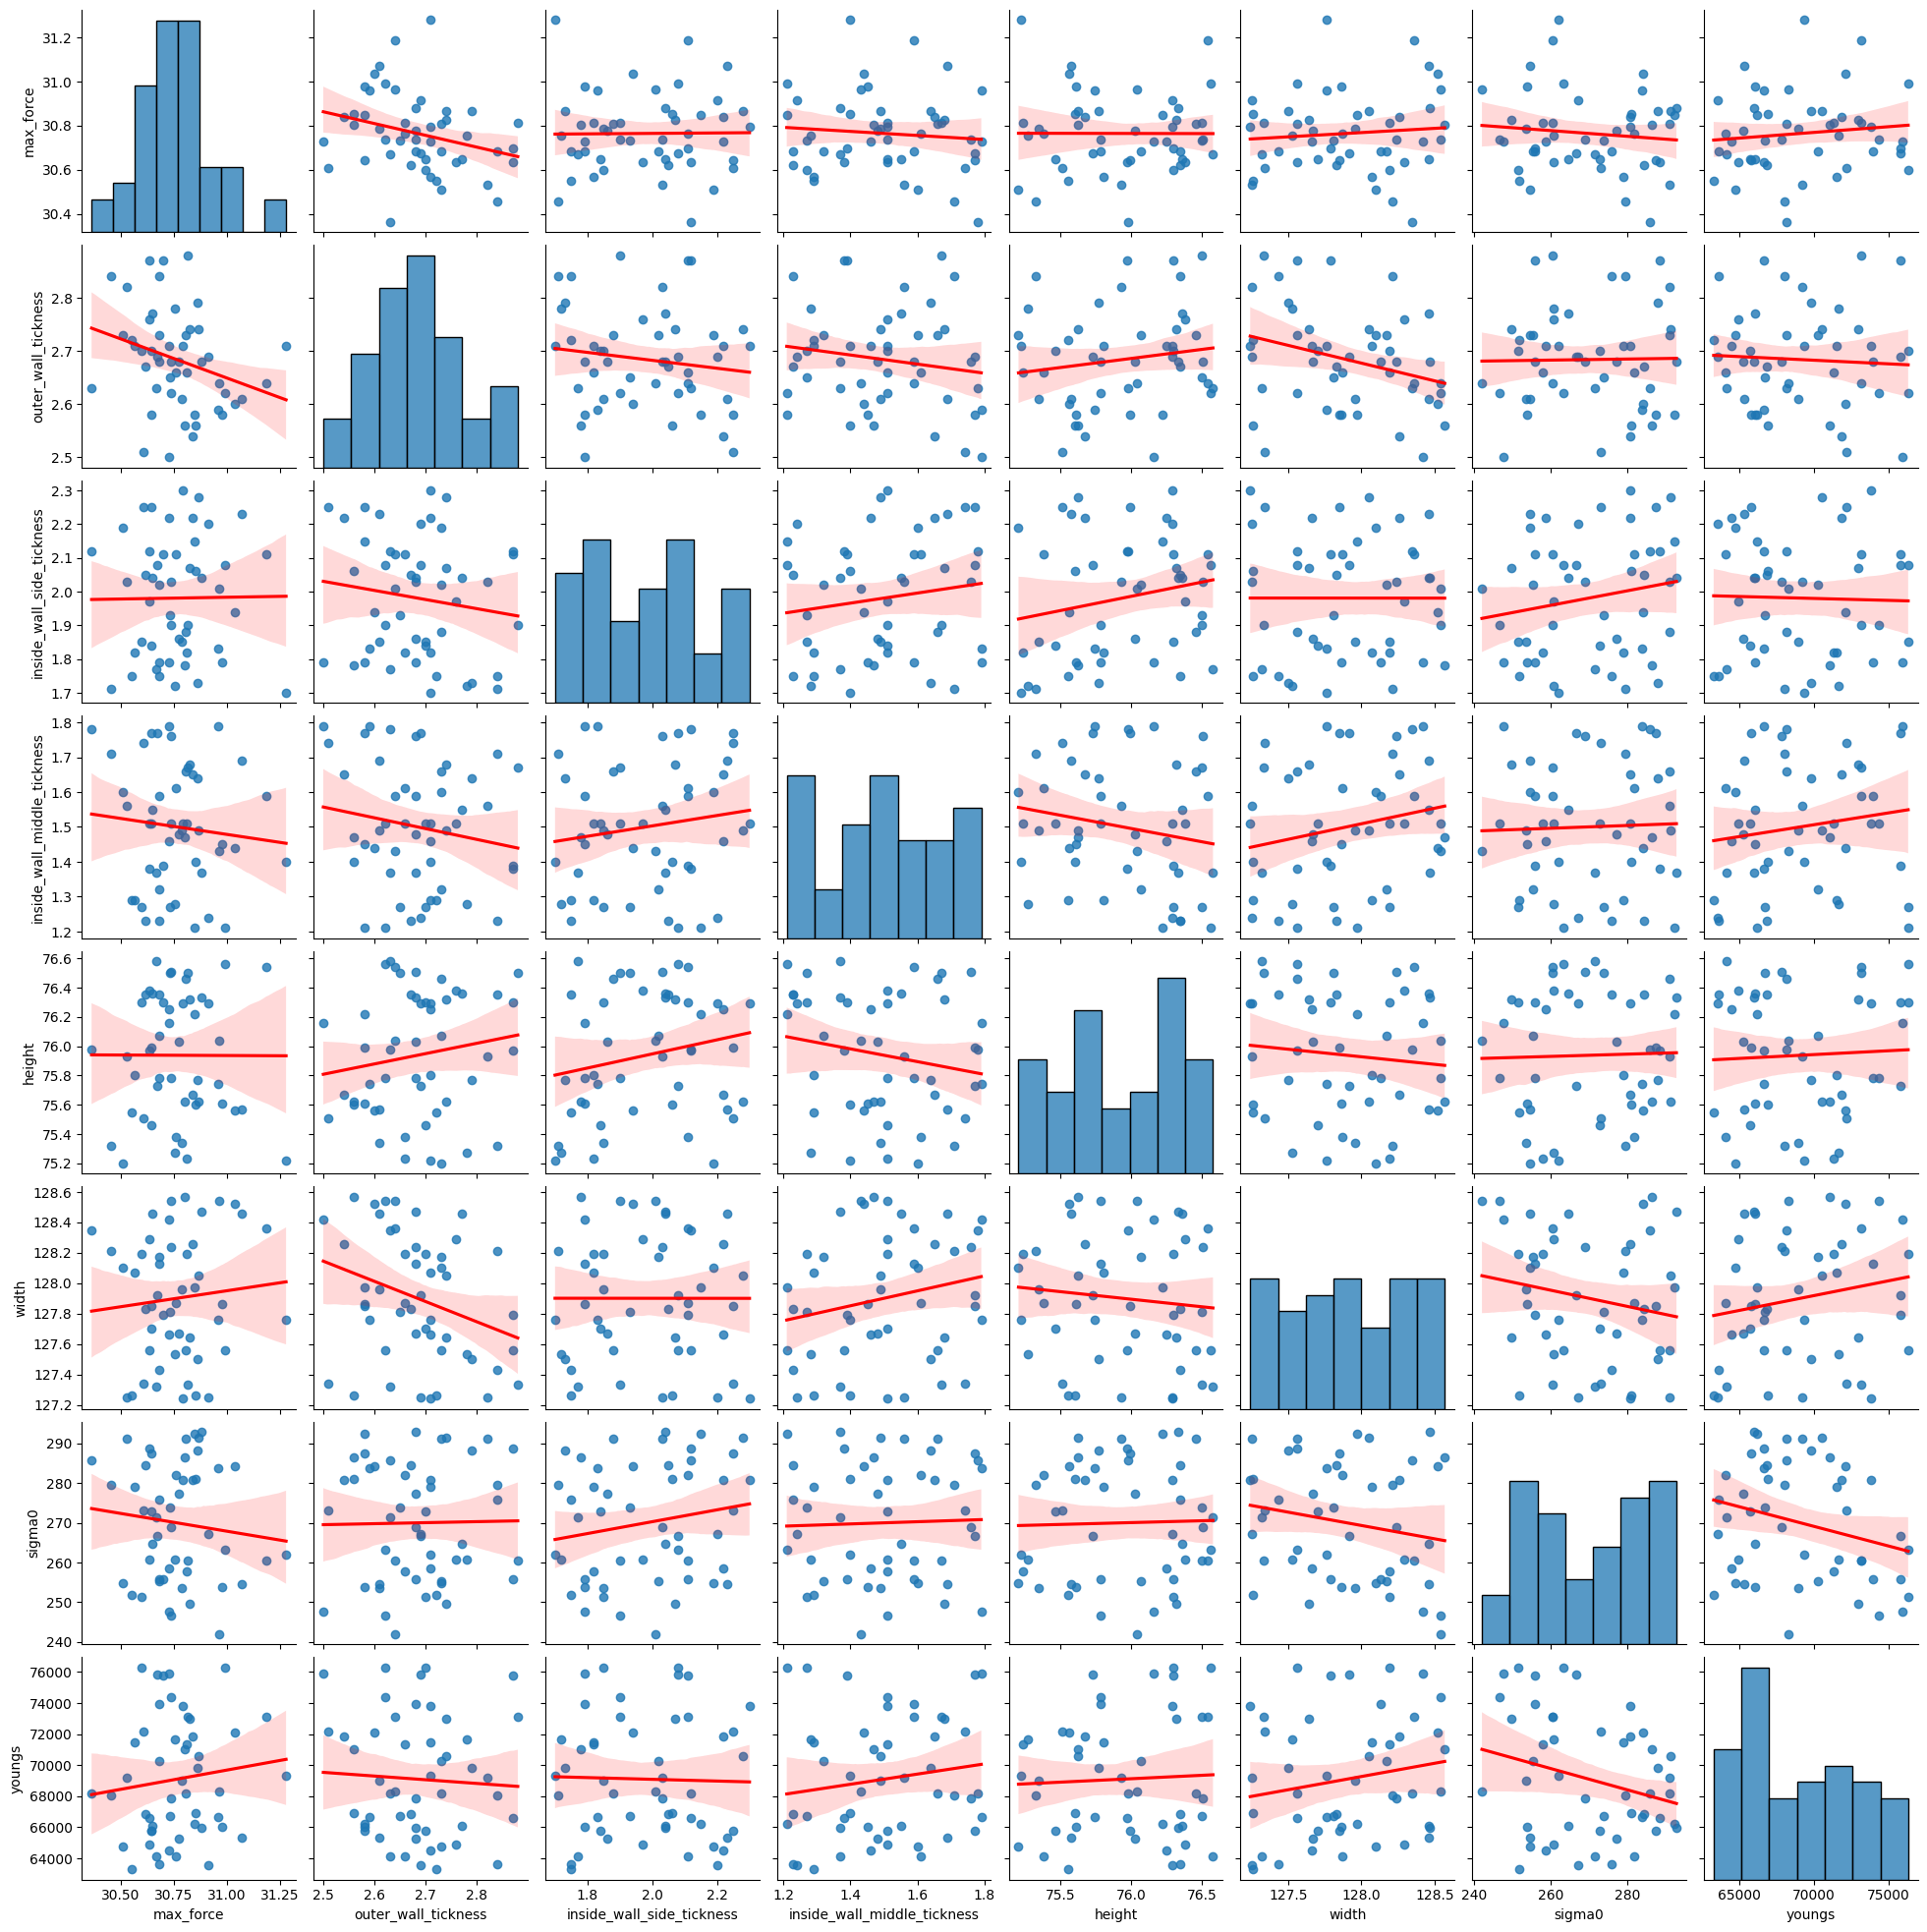

In [19]:
sb.pairplot(max_force_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [20]:
main_df = mean_force_df.join(max_force_df['max_force'])
main_df = main_df.join(energy_df['Energy'])
header = parameters.columns.tolist()[1:]
main_df = main_df[['Energy', 'mean_force', 'max_force'] + header]
main_df.head()

,Energy,mean_force,max_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,843.874761,24.993380,30.619020,2.67,2.05,1.23,76.35,127.83,284.50,66823.0
1,847.626196,25.157741,30.649348,2.77,2.04,1.55,76.36,128.46,264.61,66069.3
2,872.993077,25.857647,30.730293,2.65,1.93,1.27,76.50,127.81,273.76,66742.0
3,864.281279,25.598594,30.811150,2.66,1.82,1.51,75.23,128.19,257.80,71321.8
4,860.347260,25.509120,30.568070,2.71,1.82,1.29,75.80,128.07,278.94,71487.6


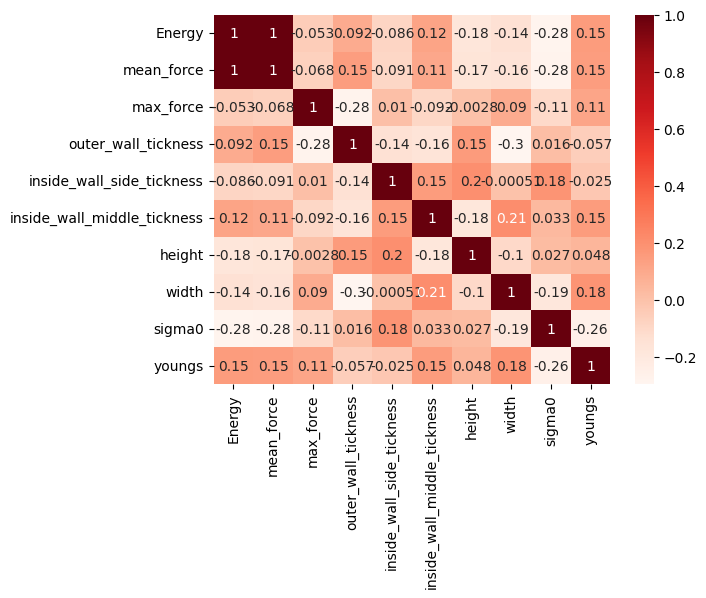

In [21]:
dataplot = sb.heatmap(main_df.corr(), cmap="Reds", annot=True)  
plt.show()

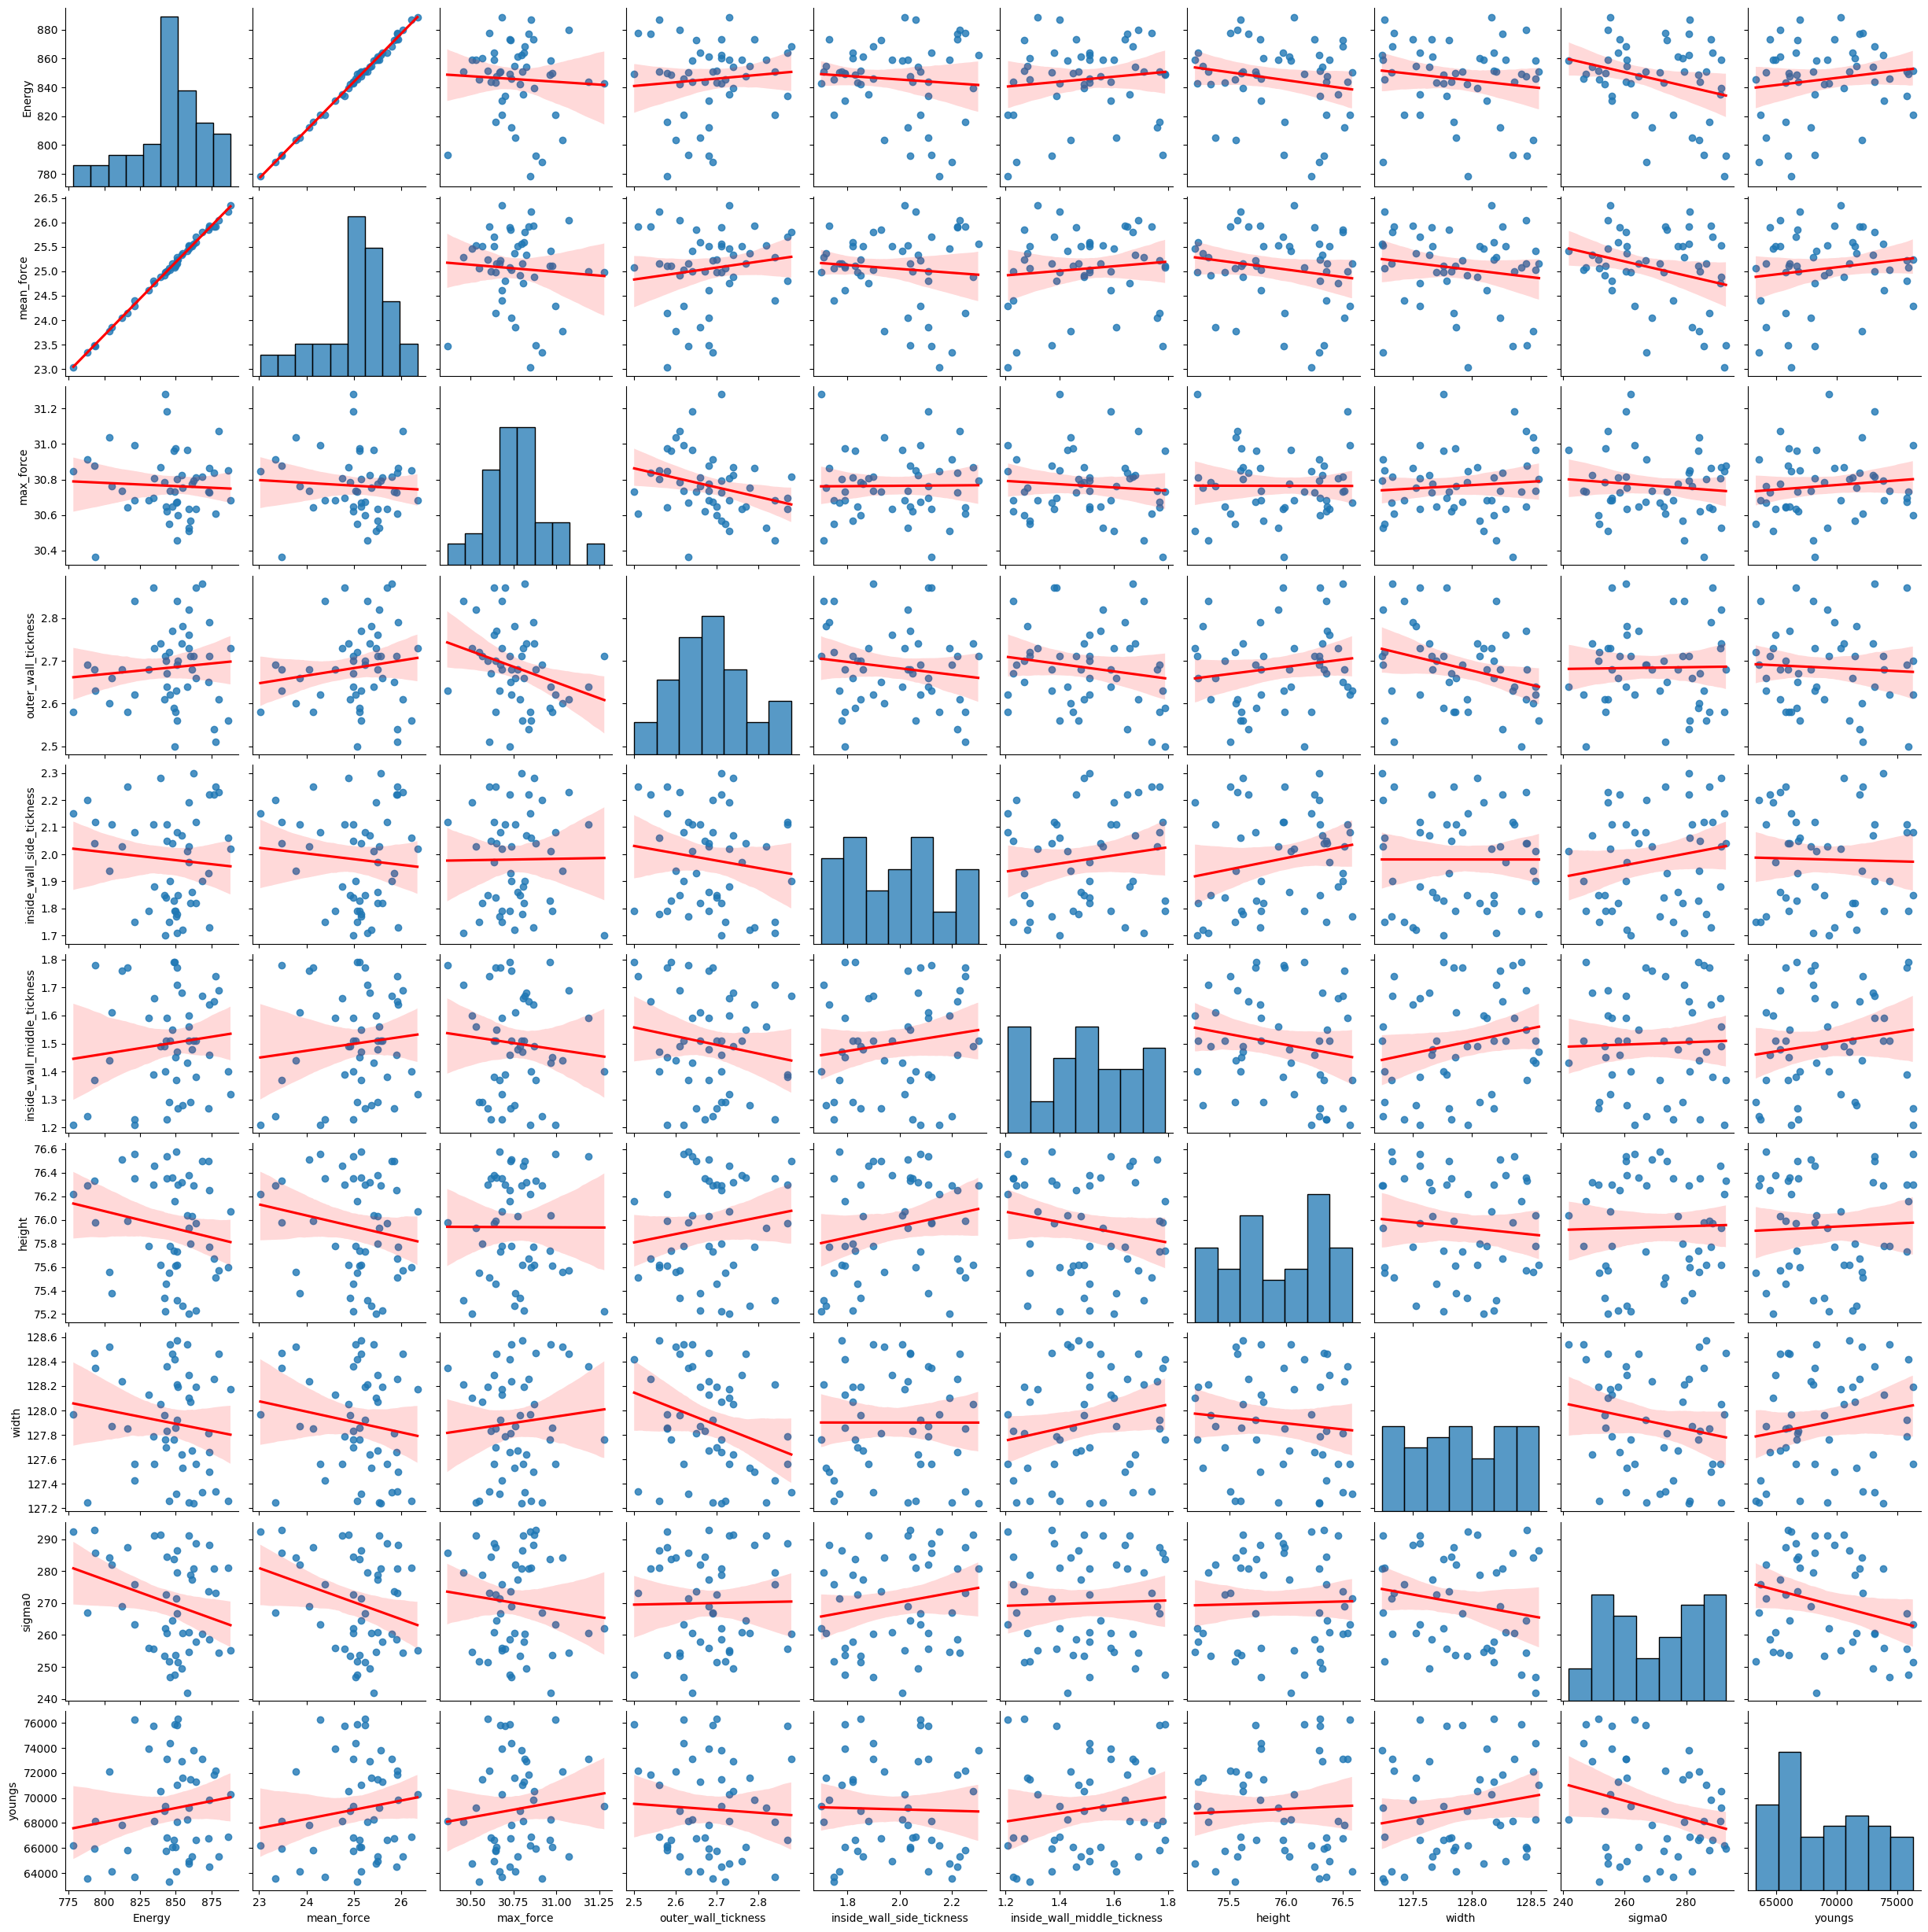

In [22]:
sb.pairplot(main_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})